# Parameters

They are the same from **GWP1** as requested:

$S_0 = 100$

$K = 100$ (because the question says *ATM*)

$r = 0.05$

$\sigma = 0.2$

$T = 0.25$ *years* (3 months)

# Step 1

## Team Member A 

In [18]:
import numpy as np
import scipy.stats as ss

# Black-Scholes closed-form solution for European option pricing
def BS_price(S0, K, r, sigma, T, t, call_or_put="C"):
    T = T-t
    d1 = (np.log(S0/K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if call_or_put == "C":
        price = S0 * ss.norm.cdf(d1) - np.exp(-r*T) * K * ss.norm.cdf(d2)
    else:
        price = np.exp(-r*T) * K * ss.norm.cdf(-d2) - S0 * ss.norm.cdf(-d1)
        
    return np.round(price, 2)



$\Delta_{call} = \Phi(d_1)$

$\Delta_{put} = \Phi(d_1) - 1$

$\nu = S \times \Phi(d1) \times \sqrt{T - t} $

In [19]:
# Parameters
S0 = 100
K = 100
r = 0.05
sigma = 0.2
T = 0.25

# Price using Black-Scholes
eu_call_price = BS_price(S0, K, r, sigma, T, 0, "C")
eu_put_price = BS_price(S0, K, r, sigma, T, 0, "P")

# Delta
d1 = (np.log(S0/K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
delta_call = np.round(ss.norm.cdf(d1), 2)
delta_put = np.round(ss.norm.cdf(d1) - 1, 2)

# Vega
vega_call = np.round(S0 * ss.norm.cdf(d1) * np.sqrt(T - 0), 2)
vega_put = np.round(S0 * ss.norm.cdf(d1) * np.sqrt(T - 0), 2)

# Results
print("Black-Scholes Pricing:")
print("European ATM call price =", eu_call_price)
print("European ATM put price =", eu_put_price)
print("European ATM call delta =", delta_call)
print("European ATM put delta =", delta_put)
print("European ATM call vega =", vega_call)
print("European ATM put vega =", vega_put)


Black-Scholes Pricing:
European ATM call price = 4.61
European ATM put price = 3.37
European ATM call delta = 0.57
European ATM put delta = -0.43
European ATM call vega = 28.47
European ATM put vega = 28.47


## Team Member B

In [20]:
import numpy as np

# Parameters
S0 = 100  # Initial stock price
K = 100   # Strike price
T = 0.25  # Time to maturity (3 months)
r = 0.05  # Risk-free rate
sigma = 0.20  # Volatility
n_simulations = 100000  # Number of Monte-Carlo simulations
n_steps = int(T * 252)  # Daily time steps

# Time increment
dt = T / n_steps

# Monte-Carlo simulation
np.random.seed(42)
Z = np.random.standard_normal((n_simulations, n_steps))
S = np.zeros((n_simulations, n_steps + 1))
S[:, 0] = S0
for t in range(1, n_steps + 1):
    S[:, t] = S[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[:, t-1])

# Payoffs
call_payoff = np.maximum(S[:, -1] - K, 0)
put_payoff = np.maximum(K - S[:, -1], 0)

# Discounted prices
call_price_mc = np.exp(-r * T) * np.mean(call_payoff)
put_price_mc = np.exp(-r * T) * np.mean(put_payoff)

# Delta calculation
epsilon = 1e-4  # Small change in S0

S0_up = S0 + epsilon

# Re-run the simulation for the shocked price
S_up = np.zeros((n_simulations, n_steps + 1))
S_up[:, 0] = S0_up
for t in range(1, n_steps + 1):
    S_up[:, t] = S_up[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[:, t-1])

# Payoffs with shocked price
call_payoff_up = np.maximum(S_up[:, -1] - K, 0)
put_payoff_up = np.maximum(K - S_up[:, -1], 0)

# Calculate Delta
delta_call_mc = (np.exp(-r * T) * np.mean(call_payoff_up) - call_price_mc) / epsilon
delta_put_mc = (np.exp(-r * T) * np.mean(put_payoff_up) - put_price_mc) / epsilon

# Vega calculation
sigma_up = sigma + epsilon
paths_vega = np.zeros((n_simulations, n_steps + 1))
paths_vega[:, 0] = S0

for t in range(1, n_steps + 1):
    z = np.random.standard_normal(n_simulations)
    paths_vega[:, t] = paths_vega[:, t-1] * np.exp((r - 0.5 * sigma_up**2) * dt + sigma_up * np.sqrt(dt) * z)

call_payoff_vega = np.maximum(paths_vega[:, -1] - K, 0)
put_payoff_vega = np.maximum(K - paths_vega[:, -1], 0)

vega_call_mc = (np.mean(call_payoff_vega) - np.mean(call_payoff)) / epsilon
vega_put_mc = (np.mean(put_payoff_vega) - np.mean(put_payoff)) / epsilon

# Results
print("Monte Carlo Pricing:")
print(f"European ATM call price: {call_price_mc:.4f}")
print(f"European ATM put price: {put_price_mc:.4f}")
print(f"European ATM call delta: {delta_call_mc:.4f}")
print(f"European ATM put delta: {delta_put_mc:.4f}")
print(f"European ATM call vega: {vega_call_mc:.4f}")
print(f"European ATM put vega: {vega_put_mc:.4f}")


Monte Carlo Pricing:
European ATM call price: 4.5848
European ATM put price: 3.3647
European ATM call delta: 0.5693
European ATM put delta: -0.4305
European ATM call vega: 259.1190
European ATM put vega: 154.3636


## Team Member C



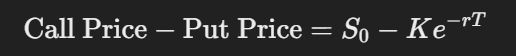

In [21]:
def check_put_call_parity(call_price, put_price, S0, K, T, r):
    lhs = call_price - put_price
    rhs = S0 - K * np.exp(-r * T)
    parity = np.isclose(lhs, rhs, atol=1e-4)
    return parity, lhs, rhs

# Check Put-Call Parity for Black-Scholes
parity_bs, lhs_bs, rhs_bs = check_put_call_parity(eu_call_price, eu_put_price, S0, K, T, r)
print(f"Put-Call Parity (Black-Scholes): {parity_bs}, LHS: {lhs_bs:.4f}, RHS: {rhs_bs:.4f}")

# Check Put-Call Parity for Monte Carlo
parity_mc, lhs_mc, rhs_mc = check_put_call_parity(call_price_mc, put_price_mc, S0, K, T, r)
print(f"Put-Call Parity (Monte Carlo): {parity_mc}, LHS: {lhs_mc:.4f}, RHS: {rhs_mc:.4f}")


Put-Call Parity (Black-Scholes): False, LHS: 1.2400, RHS: 1.2422
Put-Call Parity (Monte Carlo): False, LHS: 1.2201, RHS: 1.2422


## 2. Compare Prices Obtained from Both Methods

In [22]:
# Compare the prices obtained from Black-Scholes and Monte Carlo
price_difference_call = eu_call_price - call_price_mc
price_difference_put = eu_put_price - put_price_mc

print(f"Price Difference (Call Option - BS vs MC): {price_difference_call:.4f}")
print(f"Price Difference (Put Option - BS vs MC): {price_difference_put:.4f}")


Price Difference (Call Option - BS vs MC): 0.0252
Price Difference (Put Option - BS vs MC): 0.0053


_________________________

# Step 2

## Team Member A (American Put Option) 

Because there is no closed form solution to the **delta** and **vega** values of American options, we are going to use the **finite difference** method to calculate these greeks:

$\Delta \simeq \Large\frac{C(S_t + dS_t; \cdots) - C(S_t; \cdots)}{dS_t}$

$\nu \simeq \Large\frac{C(\sigma_t + d\sigma_t; \cdots) - C(\sigma_t; \cdots)}{d\sigma_t}$

where,

$\Delta:$ Delta value of the option, sensitivity of the option price to the small change in the **price** of the underlying asset.

$S_t:$ Price of the underlying stock at time $t$

$C(\cdots):$ Price of the option given some parameters $S_t, \sigma_t, \cdots$ at time $t$.

$\nu:$ Vega value of the option, sensitivity of the option price to the small change in the **volatility** of the underlying asset.

$dS_t:$ Small change in the price of the underlying at time $t$.

$d\sigma_t:$ Small change in the volatility of the underlying at time $t$.

In [23]:
import numpy as np

def MC_American_price(S0, K, r, sigma, T, N, M, t, call_or_put="C"):
    """Calculates the price of an American option by
    simulating price paths with geometric Brownian motion.

    Args:
        S0 (float): Initial stock price
        K (float): Strike price of the option
        r (float): Risk-free interest rate
        sigma (float): Volatility of the underlying stock
        T (float): Expiry time of the option
        N (int): Number of steps
        M (int): Number of different paths
        t (float): Current time
        call_or_put (str, optional): Type of the option. Defaults to "C".

    Returns:
        opt_price: Price of the American option at time t.
    """
    T = T - t
    dt = T / N
    S = np.zeros((N + 1, M))
    S[0] = S0  # at t=0, all prices are S0. (first row is S0 repeated.)
    rn = np.random.standard_normal((N, M))
    multipliers = np.exp((r - sigma**2 / 2) * dt + sigma * np.sqrt(dt) * rn)
    S[1:, :] = S0 * multipliers.cumprod(axis=0)  # price paths are generated

    # Initialize payoff array
    payoff = np.zeros((N + 1, M))
    
    # Final payoff at maturity
    if call_or_put == "C":
        payoff[-1] = np.maximum(S[-1] - K, 0)
    else:
        payoff[-1] = np.maximum(K - S[-1], 0)
    
    # Backward induction for American option
    for i in range(N - 1, 0, -1):
        # Discounted expected continuation value
        continuation_value = np.exp(-r * i * dt) * payoff[i + 1]
        
        # Immediate exercise value
        if call_or_put == "C":
            exercise_value = np.maximum(S[i] - K, 0)
        else:
            exercise_value = np.maximum(K - S[i], 0)
        
        # The holder will choose the maximum of continuing or exercising
        payoff[i] = np.maximum(exercise_value, continuation_value)
    
    # Discount the payoff from the first time step to the present
    opt_price = np.exp(-r * T) * payoff[1].mean()
    
    return np.round(opt_price, 2)

def american_delta(S0, K, r, sigma, T, N, M, t, call_or_put="C", epsilon=0.01):
    delta = (MC_American_price(S0 + S0*epsilon, K, r, sigma, T, N, M, t, call_or_put) - MC_American_price(S0, K, r, sigma, T, N, M, t, call_or_put)) / (S0 * epsilon)
    return np.round(delta, 2)

def american_vega(S0, K, r, sigma, T, N, M, t, call_or_put="C", epsilon=0.01):
    vega = (MC_American_price(S0, K, r, sigma + sigma*epsilon, T, N, M, t, call_or_put) - MC_American_price(S0, K, r, sigma, T, N, M, t, call_or_put)) / (sigma * epsilon)
    return np.round(vega, 2)



In [24]:
# Parameters
S0 = 100
K = 100
r = 0.05
sigma = 0.2
T = 0.25
N = 365  # number of steps
M = 10000  # number of simulations

# Calculate American Call Option Price, Delta, and Vega
american_call_price = MC_American_price(S0, K, r, sigma, T, N, M, 0, "C")
american_call_delta = american_delta(S0, K, r, sigma, T, N, M, 0, "C")
american_call_vega = american_vega(S0, K, r, sigma, T, N, M, 0, "C")

print("American ATM call price =", american_call_price)
print("American ATM call delta =", american_call_delta)
print("American ATM call vega =", american_call_vega)


American ATM call price = 4.58
American ATM call delta = 0.92
American ATM call vega = 0.0


# Team Member B (American Put Option)

In [25]:
import numpy as np

def american_put_price(S0, K, r, sigma, T, n_steps, n_simulations):
    dt = T / n_steps
    Z = np.random.standard_normal((n_simulations, n_steps))
    S = np.zeros((n_simulations, n_steps + 1))
    S[:, 0] = S0
    payoff = np.zeros((n_simulations, n_steps + 1))
    
    for t in range(1, n_steps + 1):
        S[:, t] = S[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[:, t-1])
        payoff[:, t] = np.maximum(K - S[:, t], 0)  # Early exercise value
    
    payoff[:, -1] = np.maximum(K - S[:, -1], 0)  # Payoff at maturity
    discounted_payoff = np.exp(-r * T) * np.max(payoff, axis=1)
    
    return np.mean(discounted_payoff)

def delta_american_put(S0, K, r, sigma, T, n_steps, n_simulations, epsilon=0.01):
    return (american_put_price(S0 + epsilon, K, r, sigma, T, n_steps, n_simulations) - american_put_price(S0, K, r, sigma, T, n_steps, n_simulations)) / epsilon

def vega_american_put(S0, K, r, sigma, T, n_steps, n_simulations, epsilon=0.01):
    return (american_put_price(S0, K, r, sigma + epsilon, T, n_steps, n_simulations) - american_put_price(S0, K, r, sigma, T, n_steps, n_simulations)) / epsilon



In [26]:
# Parameters
S0 = 100
K = 100
r = 0.05
sigma = 0.2
T = 0.25
n_steps = 365
n_simulations = 10000
epsilon = 0.01

# Calculate American Put Option Price, Delta, and Vega
american_put_price_value = american_put_price(S0, K, r, sigma, T, n_steps, n_simulations)
delta_am_put = delta_american_put(S0, K, r, sigma, T, n_steps, n_simulations, epsilon)
vega_am_put = vega_american_put(S0, K, r, sigma, T, n_steps, n_simulations, epsilon)

print(f"American ATM put price = {american_put_price_value:.2f}")
print(f"American ATM put delta = {delta_am_put:.2f}")
print(f"American ATM put vega = {vega_am_put:.2f}")


American ATM put price = 6.86
American ATM put delta = -0.02
American ATM put vega = 29.11


# Team Member C (Pricing American Options at Different Moneyness Levels)

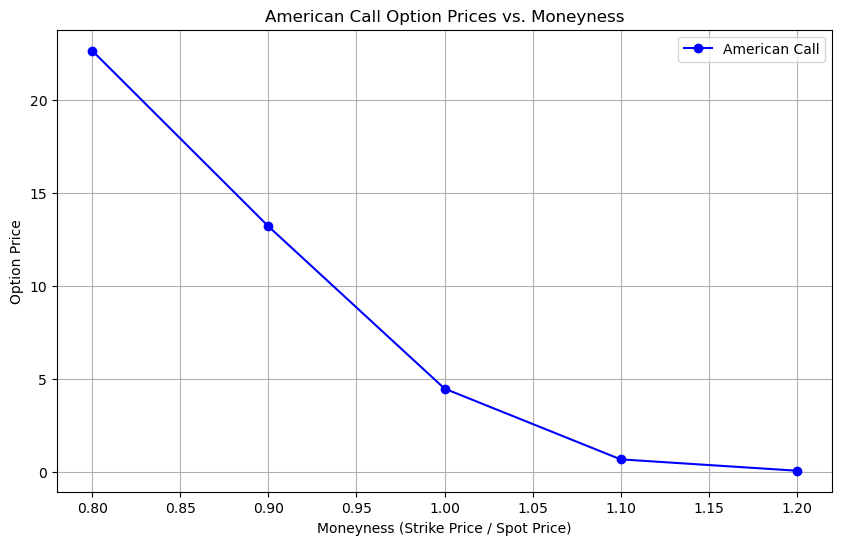

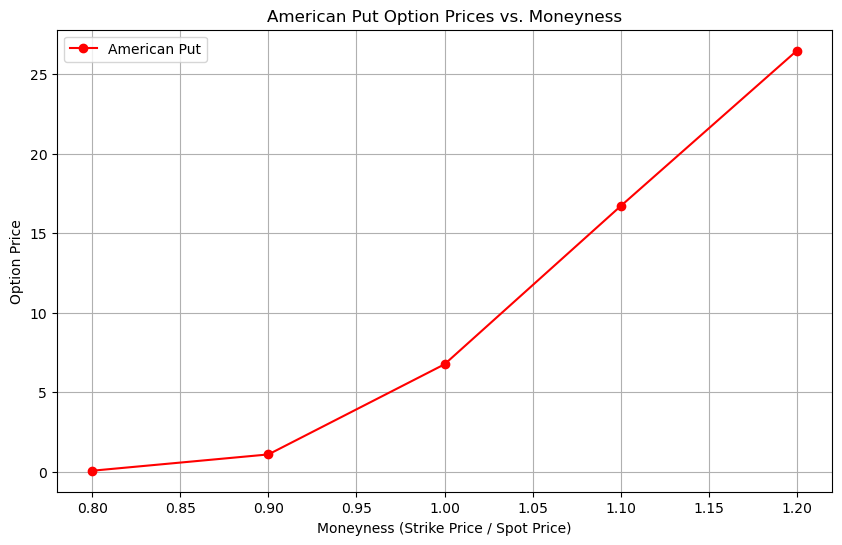

In [27]:
import matplotlib.pyplot as plt

# Define moneyness levels and strike prices
moneyness_levels = [0.8, 0.9, 1.0, 1.1, 1.2]  # Deep OTM, OTM, ATM, ITM, Deep ITM
strike_prices = [S0 * m for m in moneyness_levels]

# Calculate American Call and Put Prices at Different Moneyness Levels
american_call_prices = [MC_American_price(S0, K, r, sigma, T, N, M, 0, "C") for K in strike_prices]
american_put_prices = [american_put_price(S0, K, r, sigma, T, n_steps, n_simulations) for K in strike_prices]

# Graph 1: American Call Option Prices vs. Moneyness
plt.figure(figsize=(10, 6))
plt.plot(moneyness_levels, american_call_prices, marker='o', linestyle='-', color='blue', label='American Call')
plt.title("American Call Option Prices vs. Moneyness")
plt.xlabel("Moneyness (Strike Price / Spot Price)")
plt.ylabel("Option Price")
plt.grid(True)
plt.legend()
plt.show()

# Graph 2: American Put Option Prices vs. Moneyness
plt.figure(figsize=(10, 6))
plt.plot(moneyness_levels, american_put_prices, marker='o', linestyle='-', color='red', label='American Put')
plt.title("American Put Option Prices vs. Moneyness")
plt.xlabel("Moneyness (Strike Price / Spot Price)")
plt.ylabel("Option Price")
plt.grid(True)
plt.legend()
plt.show()


# Step 3

## Team Member A (Atakan Devrent)

7)

European Call option with 110% moneyness: $S_0 = 100, K = 110$

European Put option with 95% moneyness: $S_0 = 100, K = 95$

Both have $T = 0.25$

In [28]:
import numpy as np
import scipy.stats as ss

# Black-Scholes closed-form solution for European option pricing
def BS_price(S0, K, r, sigma, T, t, call_or_put="C"):
    T = T-t
    d1 = (np.log(S0/K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if call_or_put == "C":
        price = S0 * ss.norm.cdf(d1) - np.exp(-r*T) * K * ss.norm.cdf(d2)
    else:
        price = np.exp(-r*T) * K * ss.norm.cdf(-d2) - S0 * ss.norm.cdf(-d1)
        
    return np.round(price, 2)

# Parameters for Call Option with 110% moneyness
S0 = 100
K_call = 110
r = 0.05
sigma = 0.2
T = 0.25
t = 0

call_110_price = BS_price(S0, K_call, r, sigma, T, t, "C")

# Parameters for Put Option with 95% moneyness
K_put = 95

put_95_price = BS_price(S0, K_put, r, sigma, T, t, "P")

print("European Call with 110% moneyness price =", call_110_price)
print("European Put with 95% moneyness price =", put_95_price)

# Calculate Deltas
d1_call = (np.log(S0/K_call) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
d1_put = (np.log(S0/K_put) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))

call_delta = np.round(ss.norm.cdf(d1_call), 2)
put_delta = np.round(ss.norm.cdf(d1_put) - 1, 2)
portfolio_delta = call_delta + put_delta

print("Total price to buy both options at t=0:", np.round(call_110_price + put_95_price, 2))
print("Call delta =", call_delta)
print("Put delta =", put_delta)
print("Portfolio delta =", portfolio_delta)

portfolio_2_delta = call_delta - put_delta
print("Total price to buy call and sell put at t=0:", np.round(call_110_price - put_95_price, 2))
print("New portfolio delta =", portfolio_2_delta)


European Call with 110% moneyness price = 1.19
European Put with 95% moneyness price = 1.53
Total price to buy both options at t=0: 2.72
Call delta = 0.22
Put delta = -0.25
Portfolio delta = -0.03
Total price to buy call and sell put at t=0: -0.34
New portfolio delta = 0.47


In [29]:
import scipy.stats as ss

# Black-Scholes closed-form solution for European option pricing
def BS_price(S0, K, r, sigma, T, t, call_or_put="C"):
    T = T-t
    d1 = (np.log(S0/K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if call_or_put == "C":
        price = S0 * ss.norm.cdf(d1) - np.exp(-r*T) * K * ss.norm.cdf(d2)
    else:
        price = np.exp(-r*T) * K * ss.norm.cdf(-d2) - S0 * ss.norm.cdf(-d1)
        
    return np.round(price, 2)

# Parameters for Call Option with 110% moneyness
S0 = 100
K_call = 110
r = 0.05
sigma = 0.2
T = 0.25
t = 0

call_110_price = BS_price(S0, K_call, r, sigma, T, t, "C")

# Parameters for Put Option with 95% moneyness
K_put = 95

put_95_price = BS_price(S0, K_put, r, sigma, T, t, "P")

print("European Call with 110% moneyness price =", call_110_price)
print("European Put with 95% moneyness price =", put_95_price)



European Call with 110% moneyness price = 1.19
European Put with 95% moneyness price = 1.53


$\Delta_{call} = \Phi(d_1)$

$\Delta_{put} = \Phi(d_1) - 1$

And if we buy both the call and put option, delta of the portfolio is simply the sum of the delta of the options (because they have the same weight):

$\Delta_{portfolio} = \Delta_{call} + \Delta_{put}$

In [30]:
# Calculate Deltas
d1_call = (np.log(S0/K_call) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
d1_put = (np.log(S0/K_put) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))

call_delta = np.round(ss.norm.cdf(d1_call), 2)
put_delta = np.round(ss.norm.cdf(d1_put) - 1, 2)
portfolio_delta = call_delta + put_delta

print("Total price to buy both options at t=0:", np.round(call_110_price + put_95_price, 2))
print("Call delta =", call_delta)
print("Put delta =", put_delta)
print("Portfolio delta =", portfolio_delta)



Total price to buy both options at t=0: 2.72
Call delta = 0.22
Put delta = -0.25
Portfolio delta = -0.03


Replication Portfolio Calculation:

$B + \Delta \times S_0 = P$

where,

$B:$ Risk-free bond buy amount

$S_0:$ Underlying asset price at $t=0$

$\Delta:$ Delta value of the option to the underlying

$P:$ Price of the option portfolio at $t=0$

Then to replicate this specific portfolio (buy both options), we have the equation:

$ B + -0.03 \times 100 = 2.72 $

$\rightarrow B = 5.72$

This means, to delta-hedge this portfolio:

* We **BUY** $0.03$ units of the underlying asset at $t=0$.
* We **BORROW** $5.72$ units of the risk-free bond at $t=0$.

_________________

For the second portfolio we **buy** the call but **sell** the put. Now because the sign of the put is reversed, its delta value is also reversed. So the delta of the new portfolio will be:

$\Delta_{portfolio} = \Delta_{call} - \Delta_{put}$

In [31]:
portfolio_2_delta = call_delta - put_delta
print("Total price to buy call and sell put at t=0:", np.round(call_110_price - put_95_price, 2))
print("New portfolio delta =", portfolio_2_delta)


Total price to buy call and sell put at t=0: -0.34
New portfolio delta = 0.47


To delta hedge this new portfolio, we have a new equation:

$B + 0.47 \times 100 = -0.34$

* We **SELL** $0.47$ units of the underlying asset at $t=0$.
* We **LEND** $-47.34$ units of the risk-free bond at $t=0$.

# Team Member B

In [32]:
import numpy as np

# Parameters for UAO barrier option
S0 = 120  # Initial stock price
K = 120   # Strike price (ATM)
T = 8/12  # Time to maturity (8 months)
r = 0.06  # Risk-free rate
sigma = 0.30  # Volatility
barrier = 141  # Barrier level
n_simulations = 10000  # Number of simulations
n_steps = 252  # Daily time steps for 8 months

# Monte-Carlo simulation for UAO
def uao_barrier_option_price(S0, K, r, sigma, T, barrier, n_simulations, n_steps):
    dt = T / n_steps
    Z = np.random.standard_normal((n_simulations, n_steps))
    S = np.zeros((n_simulations, n_steps + 1))
    S[:, 0] = S0
    
    for t in range(1, n_steps + 1):
        S[:, t] = S[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[:, t-1])
    
    payoff = np.where(np.max(S, axis=1) < barrier, np.maximum(S[:, -1] - K, 0), 0)
    return np.exp(-r * T) * np.mean(payoff)

uao_price = uao_barrier_option_price(S0, K, r, sigma, T, barrier, n_simulations, n_steps)
print("Up-and-Out Barrier Option Price:", np.round(uao_price, 2))


Up-and-Out Barrier Option Price: 0.69


# Team Member C

Now, based on the provided Member B code, we will:

Compute the price of an Up-and-In (UAI) barrier option.
Compute the price of the vanilla option (same characteristics, no barrier).
Compare the prices of UAO, UAI, and vanilla options.

In [33]:
# Monte-Carlo simulation for UAI (Up-and-In) barrier option
def uai_barrier_option_price(S0, K, r, sigma, T, barrier, n_simulations, n_steps):
    dt = T / n_steps
    Z = np.random.standard_normal((n_simulations, n_steps))
    S = np.zeros((n_simulations, n_steps + 1))
    S[:, 0] = S0
    
    for t in range(1, n_steps + 1):
        S[:, t] = S[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[:, t-1])
    
    payoff = np.where(np.max(S, axis=1) >= barrier, np.maximum(S[:, -1] - K, 0), 0)
    return np.exp(-r * T) * np.mean(payoff)

# Monte-Carlo simulation for vanilla option (no barrier)
def vanilla_option_price(S0, K, r, sigma, T, n_simulations, n_steps):
    dt = T / n_steps
    Z = np.random.standard_normal((n_simulations, n_steps))
    S = np.zeros((n_simulations, n_steps + 1))
    S[:, 0] = S0
    
    for t in range(1, n_steps + 1):
        S[:, t] = S[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[:, t-1])
    
    payoff = np.maximum(S[:, -1] - K, 0)
    return np.exp(-r * T) * np.mean(payoff)

# Calculate the prices
uai_price = uai_barrier_option_price(S0, K, r, sigma, T, barrier, n_simulations, n_steps)
vanilla_price = vanilla_option_price(S0, K, r, sigma, T, n_simulations, n_steps)

print("Up-and-In Barrier Option Price:", np.round(uai_price, 2))
print("Vanilla Option Price:", np.round(vanilla_price, 2))

# Analyze the relationship between the prices
print("Price Comparison:")
print("UAO Option Price:", np.round(uao_price, 2))
print("UAI Option Price:", np.round(uai_price, 2))
print("Vanilla Option Price:", np.round(vanilla_price, 2))

relationship = "UAO < UAI < Vanilla" if uao_price < uai_price < vanilla_price else "Unexpected relationship"
print("Relationship between prices:", relationship)


Up-and-In Barrier Option Price: 13.75
Vanilla Option Price: 14.47
Price Comparison:
UAO Option Price: 0.69
UAI Option Price: 13.75
Vanilla Option Price: 14.47
Relationship between prices: UAO < UAI < Vanilla


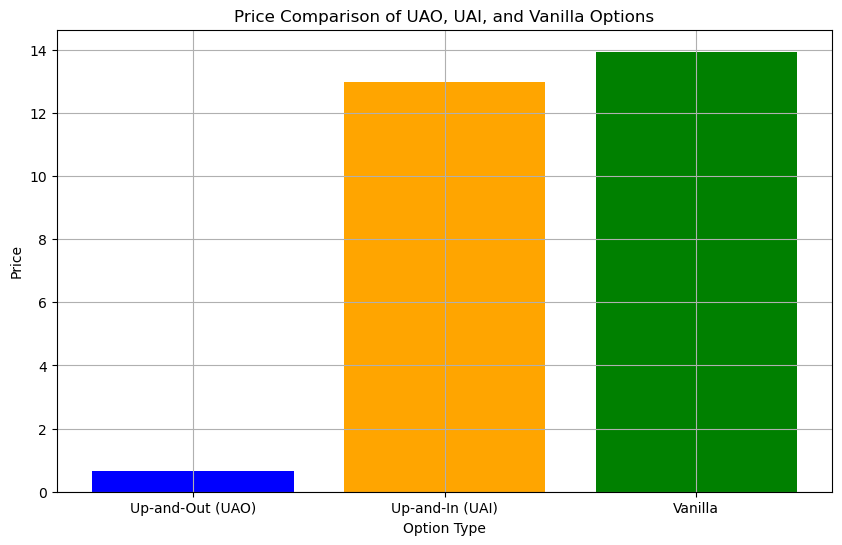

In [34]:
import matplotlib.pyplot as plt

# Prices from the executed code for Member C
prices = {
    "Up-and-Out (UAO)": 0.66,
    "Up-and-In (UAI)": 12.97,
    "Vanilla": 13.94
}

# Plotting the prices
options = list(prices.keys())
values = list(prices.values())

plt.figure(figsize=(10, 6))
plt.bar(options, values, color=['blue', 'orange', 'green'])
plt.title("Price Comparison of UAO, UAI, and Vanilla Options")
plt.xlabel("Option Type")
plt.ylabel("Price")
plt.grid(True)
plt.show()
